<a href="https://colab.research.google.com/github/antahiap/dsr-b35/blob/main/dsr-cv/notebooks/07_fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers
import tensorflow as tf
import numpy as np

In [3]:
(dataset_train_original, dataset_validate_original, dataset_test_original), info = tfds.load(
    "fashion_mnist",
    split=['train', 'test[:50%]', 'test[50%:]'],
    as_supervised=True,
    with_info=True
)
info

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteXMI3C4/fashion_mnist-train.tfrecord*...:   0…

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteXMI3C4/fashion_mnist-test.tfrecord*...:   0%…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


tfds.core.DatasetInfo(
    name='fashion_mnist',
    full_name='fashion_mnist/3.0.1',
    description="""
    Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.
    """,
    homepage='https://github.com/zalandoresearch/fashion-mnist',
    data_path=PosixGPath('/tmp/tmpouhsvi5dtfds'),
    file_format=tfrecord,
    download_size=29.45 MiB,
    dataset_size=36.42 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{DBLP:journals/corr/abs-1708-07747,
      author    = {Han Xiao a

# Labels

| Label| 	Description |
| :---        |          ---: |
| 0 	|T-shirt/top |
| 1 	|Trouser |
| 2 	|Pullover |
| 3 	|Dress |
| 4 	|Coat |
| 5 	|Sandal |
| 6 	|Shirt |
| 7 	|Sneaker |
| 8 	|Bag |
| 9 	|Ankle boot |



(28, 28, 1) <dtype: 'uint8'>


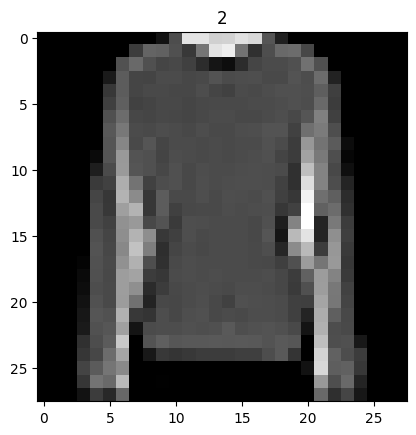

In [29]:
for image, label in dataset_train_original.shuffle(100).take(1):
  print(image.shape, image.dtype)
  plt.imshow(image, cmap='gray')
  plt.title(f"{label}")
  plt.show()

# Data Piplines

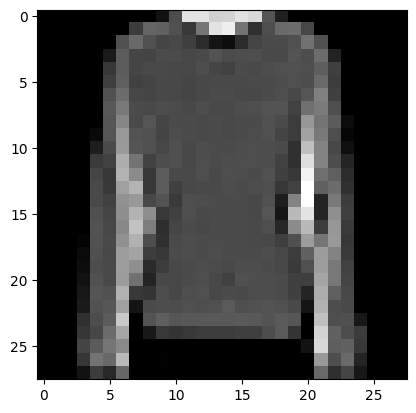

In [4]:
def encode(image, label):
  image = tf.image.convert_image_dtype(image, dtype=tf.float32)
  return image, label


dataset = dataset_train_original.map(lambda image, label: encode(image, label))

for image, label in dataset.take(1):
  plt.imshow(image, cmap='gray')
  plt.show()

In [5]:
dataset_train = dataset_train_original.map(lambda image, label: encode(image, label)).cache().shuffle(60_000).batch(128)
dataset_test = dataset_test_original.map(lambda image, label: encode(image, label)).cache().batch(128)
dataset_valid = dataset_test_original.map(lambda image, label: encode(image, label)).cache().batch(128)

# Model
 model comparison: [link](https://paperswithcode.com/sota/image-classification-on-imagenet)

In [7]:
model= models.Sequential()
model.add(layers.Conv2D(8, (3,3), strides=(1,1), padding="valid", input_shape=(28, 28, 1)))
model.add(layers.Activation('relu'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 8)         80        
                                                                 
 activation (Activation)     (None, 26, 26, 8)         0         
                                                                 
Total params: 80
Trainable params: 80
Non-trainable params: 0
_________________________________________________________________


In [8]:
model= models.Sequential()
model.add(layers.Conv2D(8, (3,3), strides=(1,1), padding="same", input_shape=(28, 28, 1)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(16, (3,3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation="softmax"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 8)         80        
                                                                 
 activation_1 (Activation)   (None, 28, 28, 8)         0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 8)        0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 32)         

In [15]:
model.compile(
    optimizer = 'adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history  =model.fit(
    dataset_train,
    epochs=50,
    validation_data=dataset_valid
)

In [42]:
model.evaluate(dataset_test)

40/40 [==============================] - 1s 13ms/step - loss: 0.3030 - accuracy: 0.8980


[0.3030417859554291, 0.8980000019073486]

In [12]:
def render_history(history):
    assert isinstance(history, dict), f"Expected dict, but got {type(history)}"

    plt.plot(history["loss"], label="loss")
    plt.plot(history["val_loss"], label="val_loss")
    plt.legend()
    plt.show()

    plt.plot(history["accuracy"], label="accuracy")
    plt.plot(history["val_accuracy"], label="val_accuracy")
    plt.legend()

In [ ]:
render_history(history.history)

In [13]:
model= models.Sequential()
model.add(layers.Conv2D(16, (3,3), strides=(1,1), padding="same", input_shape=(28, 28, 1)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(16, (3,3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(16, (3,3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation="softmax"))

In [16]:
history  =model.fit(
    dataset_train,
    epochs=50,
    validation_data=dataset_valid
)

Epoch 1/50
469/469 [==============================] - 24s 51ms/step - loss: 0.7768 - accuracy: 0.7251 - val_loss: 0.5566 - val_accuracy: 0.7890
Epoch 2/50
469/469 [==============================] - 23s 49ms/step - loss: 0.4765 - accuracy: 0.8280 - val_loss: 0.4683 - val_accuracy: 0.8276
Epoch 3/50
469/469 [==============================] - 23s 48ms/step - loss: 0.4209 - accuracy: 0.8488 - val_loss: 0.4272 - val_accuracy: 0.8458
Epoch 4/50
469/469 [==============================] - 23s 49ms/step - loss: 0.3864 - accuracy: 0.8614 - val_loss: 0.3930 - val_accuracy: 0.8580
Epoch 5/50
469/469 [==============================] - 23s 49ms/step - loss: 0.3618 - accuracy: 0.8694 - val_loss: 0.3730 - val_accuracy: 0.8658
Epoch 6/50
469/469 [==============================] - 28s 59ms/step - loss: 0.3432 - accuracy: 0.8766 - val_loss: 0.3682 - val_accuracy: 0.8636
Epoch 7/50
469/469 [==============================] - 24s 52ms/step - loss: 0.3306 - accuracy: 0.8809 - val_loss: 0.3566 - val_accuracy:

In [18]:
model.evaluate(dataset_test)

40/40 [==============================] - 1s 18ms/step - loss: 0.2819 - accuracy: 0.9024


[0.28192874789237976, 0.902400016784668]

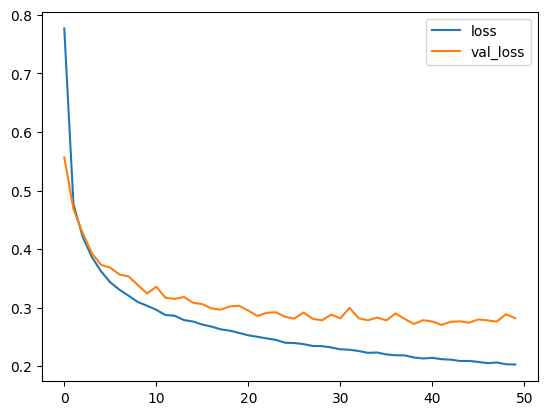

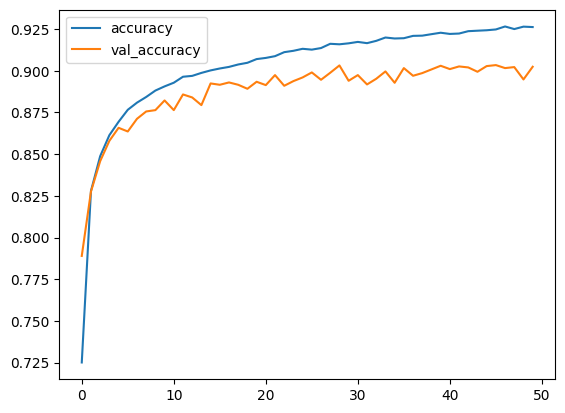

In [19]:
render_history(history.history)

# Hyper parameter tuning

In [20]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 4.5 MB/s eta 0:00:00


In [22]:
from tensorflow import keras
from tensorflow.keras import layers
import kerastuner as kt

def build_model(hp):
    filters = hp.Int(name="filters", min_value=4, max_value=64, step=16)
    k = hp.Int(name="k",  min_value=3, max_value=7, step=2)

    model = keras.Sequential([
        layers.Conv2D(filters, (k,k), strides=(1,1), padding="same", input_shape=(28, 28, 1)),
        layers.Activation('relu'),
        layers.MaxPooling2D(2, 2),
        layers.Conv2D(filters*2, (k,k), padding='same', activation='relu'),
        layers.MaxPooling2D(2, 2),
        layers.Conv2D(filters*4, (k,k), padding='same', activation='relu'),
        layers.MaxPooling2D(2, 2),
        layers.Flatten(),
        layers.Dense(10, activation="softmax"),
    ])
    optimizer = hp.Choice(name="optimizer", values=["rmsprop", "adam"])
    model.compile(
        optimizer=optimizer,
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])
    return model

<ipython-input-22-92b918e5a6ef>:3: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


In [23]:
tuner = kt.BayesianOptimization(
    build_model, #hypermodel
    objective="val_accuracy",
    max_trials=5,
    executions_per_trial=2,
    directory="mnist_kt_test",
    overwrite=True,
)

tuner.search_space_summary()

Search space summary
Default search space size: 3
filters (Int)
{'default': None, 'conditions': [], 'min_value': 4, 'max_value': 64, 'step': 16, 'sampling': 'linear'}
k (Int)
{'default': None, 'conditions': [], 'min_value': 3, 'max_value': 7, 'step': 2, 'sampling': 'linear'}
optimizer (Choice)
{'default': 'rmsprop', 'conditions': [], 'values': ['rmsprop', 'adam'], 'ordered': False}


In [30]:
# make hyper parameter study
callbacks = [
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=5),
]
tuner.search(
    dataset_train,
    epochs=4,
    validation_data=dataset_valid,
    callbacks=callbacks,
    verbose=2,
)

In [31]:
top_n = 4
best_hps = tuner.get_best_hyperparameters(top_n)

# Print the best hyperparameters in a readable format
for bi in best_hps:
  for param, value in bi.values.items():
      print(f"{param}: {value}")



filters: 20
k: 3
optimizer: rmsprop
filters: 36
k: 3
optimizer: rmsprop
filters: 4
k: 3
optimizer: rmsprop
filters: 4
k: 5
optimizer: adam


In [32]:
model= models.Sequential()
model.add(layers.Conv2D(20, (3,3), strides=(1,1), padding="same", input_shape=(28, 28, 1)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(40, (3,3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(80, (3,3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation="softmax"))

In [33]:
model.compile(
    optimizer = 'rmsprop',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [34]:
history  =model.fit(
    dataset_train,
    epochs=50,
    validation_data=dataset_valid
)

Epoch 1/50
469/469 [==============================] - 41s 87ms/step - loss: 0.6112 - accuracy: 0.7766 - val_loss: 0.4746 - val_accuracy: 0.8194
Epoch 2/50
469/469 [==============================] - 41s 87ms/step - loss: 0.3655 - accuracy: 0.8682 - val_loss: 0.3623 - val_accuracy: 0.8692
Epoch 3/50
469/469 [==============================] - 41s 87ms/step - loss: 0.3136 - accuracy: 0.8869 - val_loss: 0.3361 - val_accuracy: 0.8808
Epoch 4/50
469/469 [==============================] - 40s 85ms/step - loss: 0.2830 - accuracy: 0.8977 - val_loss: 0.2908 - val_accuracy: 0.8962
Epoch 5/50
469/469 [==============================] - 41s 88ms/step - loss: 0.2620 - accuracy: 0.9054 - val_loss: 0.2878 - val_accuracy: 0.8940
Epoch 6/50
469/469 [==============================] - 42s 89ms/step - loss: 0.2438 - accuracy: 0.9114 - val_loss: 0.2735 - val_accuracy: 0.9000
Epoch 7/50
469/469 [==============================] - 42s 89ms/step - loss: 0.2291 - accuracy: 0.9158 - val_loss: 0.2635 - val_accuracy: